In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('F:\csv/data/heart_disease_dataset.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [82]:
df.shape

(303, 14)

In [83]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.085766,0.017545,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,-0.079361,0.031518,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.019134,-0.028985,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,-0.010263,0.017149,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.068128,0.057866,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,-0.032997,-0.080552,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.057077,-0.000807,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.038729,0.050287,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.018935,-0.030035,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.091285,0.038027,0.424510


In [84]:
from scipy.stats import ttest_ind

In [85]:
HP = df.groupby('num')

In [86]:
HP_0 = HP.get_group(0)
HP_1 = HP.get_group(1)

In [87]:

for col in df:
    p_val = ttest_ind(HP_0[col],HP_1[col])[1]
    print(col,p_val)

age 8.955636917529706e-05
sex 9.851911089332832e-07
cp 5.2507349566756814e-14
trestbps 0.008548268928594928
chol 0.13914167020436527
fbs 0.6613759374817116
restecg 0.0031324013864187303
thalach 3.456964908430172e-14
exang 3.365774372106871e-15
oldpeak 1.0976053396984802e-14
slope 1.3537567141914426e-09
ca 0.40030268019345183
thal 0.9085855183589556
num 0.0


In [88]:
X = df.drop(['chol','fbs','thal','num'],axis=1)
y = df['num']

In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [91]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS = GridSearchCV(knn,param,cv=3,scoring='f1_weighted')
GS.fit(X_std,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [92]:
GS.best_params_

{'n_neighbors': 26, 'weights': 'uniform'}

In [93]:
dt = DecisionTreeClassifier(random_state=0)
param = {'criterion':['entropy','gini']}
GS = GridSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_std,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [94]:
GS.best_params_

{'criterion': 'gini'}

In [95]:
RF_var=[]
for val in np.arange(1,50):
    RF = RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(RF,X_std,y,cv=kfold,scoring='f1_weighted')
    RF_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.0010743655132770852
2 0.004925813220535131
3 0.0027003630831770467
4 0.003226114167327896
5 0.0018413044308013366
6 0.0016757212802624853
7 0.003727414764907281
8 0.0027193491219817886
9 0.004631409674836376
10 0.0029316757460421915
11 0.0032559645015604165
12 0.004060339977157639
13 0.003091159445690727
14 0.0032131689901737813
15 0.002160873785076381
16 0.0032370293186883004
17 0.0020296424695838175
18 0.0021055678779836554
19 0.002087674217215653
20 0.0010396277805619469
21 0.0016172590172290214
22 0.002657497065698311
23 0.0012902235311571435
24 0.0021381683705963407
25 0.00167350381143986
26 0.002840786129073322
27 0.0016068314319821497
28 0.0026809066606373047
29 0.0012354898820222246
30 0.001238190512793154
31 0.0008894023488700297
32 0.0016637064713588535
33 0.0013170443359033536
34 0.0016637064713588535
35 0.0008748459465731125
36 0.0010539484835262194
37 0.0010539484835262194
38 0.002227852456180137
39 0.0009421538156456849
40 0.0012530851361098572
41 0.001300233767337726

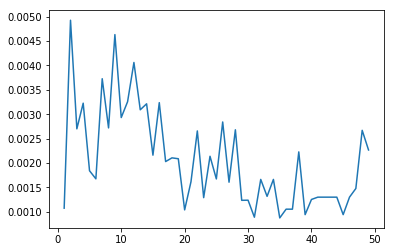

In [96]:
x_axis = np.arange(1,50)
plt.plot(x_axis,RF_var)

In [97]:
Bag_var=[]
for val in np.arange(1,50):
    Bag = BaggingClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Bag,X_std,y,cv=kfold,scoring='f1_weighted')
    Bag_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.001933514560649759
2 0.00262207688015253
3 0.0015884254335278214
4 0.0005161955481954157
5 0.0009432564140733432
6 0.0008133397081676572
7 0.0014704388663206898
8 0.000667437233440788
9 0.0007601419906623432
10 0.00020294225692905785
11 0.000330795321232002
12 1.0502722687374303e-05
13 0.0001796023660038948
14 0.00015927209665954033
15 3.733417975548219e-05
16 1.2358908067050867e-05
17 0.0002002504364315217
18 0.00041940807083858437
19 0.00018841543416326815
20 0.0008393733248444433
21 0.00012670042185762857
22 0.00011979949678016065
23 0.00024620476862486864
24 0.00018841543416326815
25 0.0002594303753722348
26 0.00010896609839529804
27 0.00010896609839529804
28 0.00011301434215997016
29 0.00026963133383954346
30 0.00010846360373036989
31 0.0002548095917821051
32 0.00022790600155194336
33 0.0006406518990910047
34 0.000940861012995269
35 0.000940861012995269
36 0.000803365651188092
37 0.0010256107380516158
38 0.0006860526743665213
39 0.0013155198475007838
40 0.000803365651188092
41

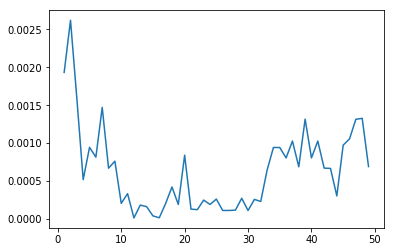

In [98]:
x_axis = np.arange(1,50)
plt.plot(x_axis,Bag_var)

In [99]:
Ada_bias=[]
for val in np.arange(1,50):
    Ada = AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Ada,X_std,y,cv=kfold,scoring='f1_weighted')
    Ada_bias.append(1-np.mean(cv_results))
    print(val,1-np.mean(cv_results))

1 0.3273249907534894
2 0.3284319762575616
3 0.2807906136574895
4 0.2551220994583471
5 0.24107805517393854
6 0.2586035137449967
7 0.24040395497534828
8 0.25045803624200513
9 0.2475945344457755
10 0.22688651986188957
11 0.21608717748683903
12 0.22247361017680556
13 0.21566145346372856
14 0.20650464804143553
15 0.21642327413047546
16 0.22226775407372024
17 0.22501460420755137
18 0.2282702238513008
19 0.2279018140108482
20 0.2313949851207564
21 0.2282216753071259
22 0.2220390107435547
23 0.23285899896980577
24 0.2261255948450297
25 0.2264924641861814
26 0.23003130298543073
27 0.23023453224866808
28 0.2302133131850237
29 0.22244389741263026
30 0.21255650090598943
31 0.21260687005508627
32 0.2026754352427792
33 0.21916478644327142
34 0.20877950717987748
35 0.21257951141711928
36 0.20914873944011292
37 0.22259068734601672
38 0.2193213698404466
39 0.22299539324055828
40 0.22586979831537557
41 0.23224075110418418
42 0.22586979831537557
43 0.22894995076687652
44 0.2291701283483789
45 0.222579398

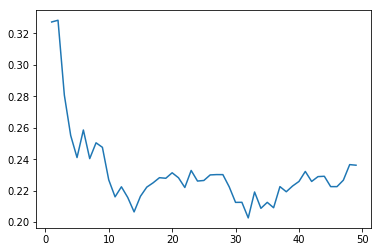

In [100]:
x_axis = np.arange(1,50)
plt.plot(x_axis,Ada_bias)

In [101]:
Ada_bias=[]
for val in np.arange(1,50):
    Ada = AdaBoostClassifier(base_estimator=LR,n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(Ada,X_std,y,cv=kfold,scoring='f1_weighted')
    Ada_bias.append(1-np.mean(cv_results))
    print(val,1-np.mean(cv_results))

1 0.2178218504849877
2 0.2211690531893279
3 0.2277526062814793
4 0.21812949245922042
5 0.22456451046458648
6 0.22791768346165042
7 0.22791768346165042
8 0.2343436062089158
9 0.23437313867006127
10 0.23114683896655286
11 0.23438508972955596
12 0.23114683896655286
13 0.2279607973918817
14 0.23156455947898102
15 0.23156455947898102
16 0.22836329561393753
17 0.22859163695850004
18 0.23204154103721086
19 0.23204154103721086
20 0.22888323660710486
21 0.22888323660710486
22 0.23204154103721086
23 0.23204154103721086
24 0.23204154103721086
25 0.23527492592486932
26 0.23875465108424132
27 0.23875465108424132
28 0.23875465108424132
29 0.23875465108424132
30 0.23875465108424132
31 0.23875465108424132
32 0.23875465108424132
33 0.23875465108424132
34 0.23875465108424132
35 0.23875465108424132
36 0.24192133931374682
37 0.24192133931374682
38 0.24192133931374682
39 0.24192133931374682
40 0.24192133931374682
41 0.24192133931374682
42 0.24192133931374682
43 0.24192133931374682
44 0.24192133931374682
45

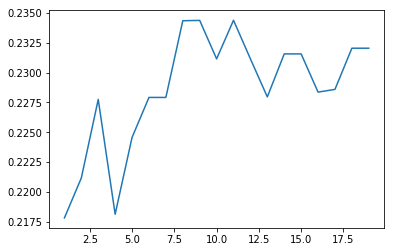

In [102]:
x_axis = np.arange(1,20)
plt.plot(x_axis,Ada_bias[:19])

In [103]:
GB_bias=[]
for val in np.arange(1,200):
    gb = GradientBoostingClassifier(n_estimators=val)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(gb,X_std,y,cv=kfold,scoring='f1_weighted')
    GB_bias.append(1-np.mean(cv_results))
    print(val,1-np.mean(cv_results))

H:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1 0.4058865302459981
2 0.28488623224886156
3 0.27656207757443685
4 0.2809263240141343
5 0.26864384313889256
6 0.2768422316008117
7 0.2571877803800433
8 0.2608468325836407
9 0.25374104484132565
10 0.246902496245605
11 0.2510676798066065
12 0.2505287742133091
13 0.24377723895541603
14 0.24740295844725235
15 0.2543496433112854
16 0.25011674739988043
17 0.24353138669793617
18 0.2508186431573085
19 0.24757666024856817
20 0.24035207002049053
21 0.23700902035080296
22 0.2296191055160267
23 0.23989038086073
24 0.23630497902141012
25 0.22675714244180523
26 0.22333849299229958
27 0.21663322227998616
28 0.22941201707183156
29 0.233262688057302
30 0.2298032874368422
31 0.2365085581491556
32 0.2299235255707276
33 0.22680145267235652
34 0.233262688057302
35 0.23599428349468576
36 0.23950683899630054
37 0.23257840885926695
38 0.2355900184214662
39 0.24235346983573514
40 0.2386377473021124
41 0.2327049177795405
42 0.23587504126923686
43 0.2258989560663207
44 0.235940834363911
45 0.23231364741452998
46

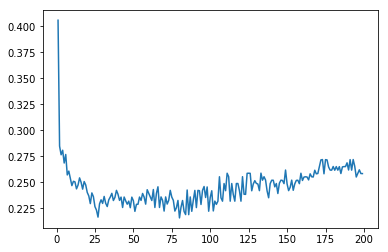

In [104]:
x_axis = np.arange(1,200)
plt.plot(x_axis,GB_bias)

In [105]:
LR = LogisticRegression()
NB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=26,weights='uniform')
DT = DecisionTreeClassifier(criterion='gini',random_state=0)
RF = RandomForestClassifier(n_estimators=31,criterion='entropy',random_state=0)
Bag = BaggingClassifier(n_estimators=10,random_state=0)
AB = AdaBoostClassifier(n_estimators=14,random_state=0)
ABL = AdaBoostClassifier(n_estimators=1,random_state=0)
GB = GradientBoostingClassifier(n_estimators=100)
GBtuning = GradientBoostingClassifier(n_estimators=80)

STACKING

In [109]:
from sklearn.ensemble import VotingClassifier
stacked = VotingClassifier(estimators=[('KNN',KNN),('Bagging',Bag),
                                       ('Adaboost',AB)],voting='soft')

In [110]:
models = []
models.append(('Logistic',LR))
models.append(('NaiveBayes',NB))
models.append(('KNN',KNN))
models.append(('Decision Tree',DT))
models.append(('Random Forest',RF))
models.append(('Bagging',Bag))
models.append(('Adaboost',AB))
models.append(('AdaboostLR',ABL))
models.append(('GBoost',GB))
models.append(('GBoost',GBtuning))
models.append(('Stacked',stacked))

Logistic: 0.771524 (0.002681)
NaiveBayes: 0.392435 (0.040831)
KNN: 0.788968 (0.002100)
Decision Tree: 0.712278 (0.001042)
Random Forest: 0.781127 (0.000357)
Bagging: 0.796412 (0.001118)
Adaboost: 0.778251 (0.001128)
AdaboostLR: 0.654976 (0.015411)
GBoost: 0.755558 (0.000081)
GBoost: 0.758047 (0.000025)
Stacked: 0.823566 (0.001850)


H:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
H:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


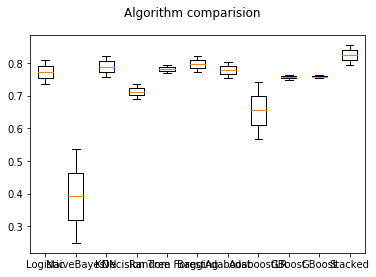

In [111]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=2,random_state=0)
    cv_results = cross_val_score(model, X_std, y, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
    
    # Box plot algorithm comparision
    
fig = plt.figure()
fig.suptitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()